# Modo de Uso API

"As chamadas são resgatadas por método **GET**, siga os exemplos a seguir para a usabilidade de cada uma"<br>  
Recuperar todas estações de acordo com o tipo passado como parâmetro:<br>
**Estações Automáticas**:** https://apitempo.inmet.gov.br/estacoes/T<br>
**Estações Manuais:** https://apitempo.inmet.gov.br/estacoes/M<br>



In [2]:
# importar bibliotecas
from dotenv import load_dotenv
import requests
import pandas as pd
import csv

In [3]:
token = load_dotenv('TOKEN')
URL_T = 'https://apitempo.inmet.gov.br/estacoes/T'

reponse = requests.get(URL_T)

if reponse.status_code == 200:
    estacoes_automaticas = reponse.json()


# Descrição das colunas

**CD_OSCAR** : 'Código internacionalmente reconhecido para a estação meteorológica'  
**DC_NOME** : 'Nome da estação meteorológica'  
**FL_CAPITAL** : 'Indicação se a estação é a capital do estado ("S" para sim, "N" para não)'  
**DT_FIM_OPERACAO** : 'Data de encerramento das operações da estação (pode ser nulo se ainda estiver em operação)'  
**CD_SITUACAO** : 'Situação atual da estação meteorológica (por exemplo, "Pane")'  
**TP_ESTACAO** : 'Tipo da estação meteorológica (por exemplo, "Automática")'  
**VL_LATITUDE** : 'Valor da latitude geográfica da estação'  
**CD_WSI** : 'Código único atribuído pela WSI (Weather Services International)'  
**CD_DISTRITO** : 'Código do distrito ao qual a estação pertence'  
**VL_ALTITUDE** : 'Altitude da estação meteorológica'  
**SG_ESTADO** : 'Sigla do estado onde a estação está localizada'  
**SG_ENTIDADE** : 'Sigla da entidade responsável pela estação meteorológica (por exemplo, "INMET")'  
**CD_ESTACAO** : 'Código único atribuído à estação'  
**VL_LONGITUDE** : 'Valor da longitude geográfica da estação'  
**DT_INICIO_OPERACAO** : 'Data de início das operações da estação meteorológica'  


In [4]:
# dados do endpoint T (automatico)
estacoes_automaticas[0]

{'CD_OSCAR': '0-2000-0-86765',
 'DC_NOME': 'ABROLHOS',
 'FL_CAPITAL': 'N',
 'DT_FIM_OPERACAO': None,
 'CD_SITUACAO': 'Pane',
 'TP_ESTACAO': 'Automatica',
 'VL_LATITUDE': '-17.96305555',
 'CD_WSI': '0-76-0-2906907000000408',
 'CD_DISTRITO': ' 04',
 'VL_ALTITUDE': '20.93',
 'SG_ESTADO': 'BA',
 'SG_ENTIDADE': 'INMET',
 'CD_ESTACAO': 'A422',
 'VL_LONGITUDE': '-38.70333333',
 'DT_INICIO_OPERACAO': '2008-07-20T21:00:00.000-03:00'}

In [5]:

type(estacoes_automaticas)

list

In [6]:
# salvar um arquivo csv com os dados das estações automaticas

df_estacoes_automaticas = pd.DataFrame(estacoes_automaticas)
df_estacoes_automaticas.head()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-86765,ABROLHOS,N,None,Pane,Automatica,-17.96305555,0-76-0-2906907000000408,04,20.93,BA,INMET,A422,-38.70333333,2008-07-20T21:00:00.000-03:00
1,0-2000-0-81755,ACARAU,N,None,Operante,Automatica,-3.1211111,0-76-0-2300200000000446,03,67.15,CE,INMET,A360,-40.08722221,2009-04-21T21:00:00.000-03:00
2,0-2000-0-86827,AFONSO CLAUDIO,None,None,Pane,Automatica,-20.10416666,0-76-0-3200102000000478,06,507.48,ES,INMET,A657,-41.10694444,2011-09-23T21:00:00.000-03:00
3,0-2000-0-86686,AGUA BOA,N,None,Operante,Automatica,-14.01638888,0-76-0-5100201000000157,09,440,MT,INMET,A908,-52.21166666,2006-12-15T21:00:00.000-03:00
4,0-2000-0-86812,AGUA CLARA,N,None,Operante,Automatica,-20.44444444,0-76-0-5000203000000463,07,323.63,MS,INMET,A756,-52.87583332,2010-08-13T21:00:00.000-03:00


In [7]:
df_estacoes_automaticas.to_csv('../data_raw/estacoes_automaticas.csv')

# Dados do endpoint M (Manual)
**Estações Manuais:** https://apitempo.inmet.gov.br/estacoes/M<br>

In [8]:
URL_M = 'https://apitempo.inmet.gov.br/estacoes/M'

reponse = requests.get(URL_M)

if reponse.status_code == 200:
    estacoes_manuais = reponse.json()

In [9]:
estacoes_manuais[0]

{'CD_OSCAR': '0-2000-0-82989',
 'DC_NOME': 'AGUA BRANCA',
 'FL_CAPITAL': 'N',
 'DT_FIM_OPERACAO': None,
 'CD_SITUACAO': 'Operante',
 'TP_ESTACAO': 'Convencional',
 'VL_LATITUDE': '-9.26472222',
 'CD_WSI': '0-76-0-2700102000W82989',
 'CD_DISTRITO': ' 03',
 'VL_ALTITUDE': '603.42',
 'SG_ESTADO': 'AL',
 'SG_ENTIDADE': 'INMET',
 'CD_ESTACAO': '82989',
 'VL_LONGITUDE': '-37.93805555',
 'DT_INICIO_OPERACAO': '1928-05-04T21:00:00.000-03:00'}

In [10]:
len(estacoes_manuais)

147

In [11]:
df_estacoes_manuais = pd.DataFrame(estacoes_manuais)
df_estacoes_manuais.head()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-82989,AGUA BRANCA,N,None,Operante,Convencional,-9.26472222,0-76-0-2700102000W82989,03,603.42,AL,INMET,82989,-37.93805555,1928-05-04T21:00:00.000-03:00
1,0-2000-0-82353,ALTAMIRA,N,None,Operante,Convencional,-3.21416666,0-76-0-1500602000W82353,02,101.51,PA,INMET,82353,-52.21305555,1927-04-23T21:00:00.000-03:00
2,0-2000-0-83007,ALTO DA BOA VISTA,N,None,Operante,Convencional,-22.96583333,0-76-0-3304557000W83007,06,347.1,RJ,INMET,83007,-43.27916666,1966-05-31T21:00:00.000-03:00
3,0-2000-0-82590,APODI,N,None,Operante,Convencional,-5.62666666,0-76-0-2401008000W82590,03,131.37,RN,INMET,82590,-37.815,1962-12-17T21:00:00.000-03:00
4,0-2000-0-83442,ARACUAI,N,None,Operante,Convencional,-16.84888888,0-76-0-3103405000W83442,05,317.67,MG,INMET,83442,-42.06083333,1918-09-05T21:00:00.000-03:00


In [12]:
df_estacoes_manuais.to_csv('../data_raw/estacoes_manuais.csv')

### Concatenar os Dataframes e exportar como CSV

In [13]:
df = pd.concat([df_estacoes_automaticas, df_estacoes_manuais], ignore_index=True)

In [14]:
df.to_csv('../data_raw/estacoes_auto_manual.csv')

### Explorar os resultados do df concatenado

In [15]:
df_estacoes_all_collumns = pd.read_csv('../data_raw/estacoes_auto_manual.csv')
df_estacoes_all_collumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          714 non-null    int64  
 1   CD_OSCAR            712 non-null    object 
 2   DC_NOME             714 non-null    object 
 3   FL_CAPITAL          603 non-null    object 
 4   DT_FIM_OPERACAO     0 non-null      float64
 5   CD_SITUACAO         714 non-null    object 
 6   TP_ESTACAO          714 non-null    object 
 7   VL_LATITUDE         714 non-null    float64
 8   CD_WSI              712 non-null    object 
 9   CD_DISTRITO         714 non-null    int64  
 10  VL_ALTITUDE         714 non-null    float64
 11  SG_ESTADO           714 non-null    object 
 12  SG_ENTIDADE         714 non-null    object 
 13  CD_ESTACAO          714 non-null    object 
 14  VL_LONGITUDE        714 non-null    float64
 15  DT_INICIO_OPERACAO  714 non-null    object 
dtypes: float

In [16]:
# selecionando aulgumas colunas

df_estacoes_descrition_basic = df_estacoes_all_collumns[['CD_ESTACAO','DC_NOME', 'SG_ESTADO','TP_ESTACAO', 'CD_DISTRITO']]
df_estacoes_descrition_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CD_ESTACAO   714 non-null    object
 1   DC_NOME      714 non-null    object
 2   SG_ESTADO    714 non-null    object
 3   TP_ESTACAO   714 non-null    object
 4   CD_DISTRITO  714 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 28.0+ KB


In [17]:
df_estacoes_descrition_basic.head()

,CD_ESTACAO,DC_NOME,SG_ESTADO,TP_ESTACAO,CD_DISTRITO
0,A422,ABROLHOS,BA,Automatica,4
1,A360,ACARAU,CE,Automatica,3
2,A657,AFONSO CLAUDIO,ES,Automatica,6
3,A908,AGUA BOA,MT,Automatica,9
4,A756,AGUA CLARA,MS,Automatica,7


## Relação Estado x CD_Distrito

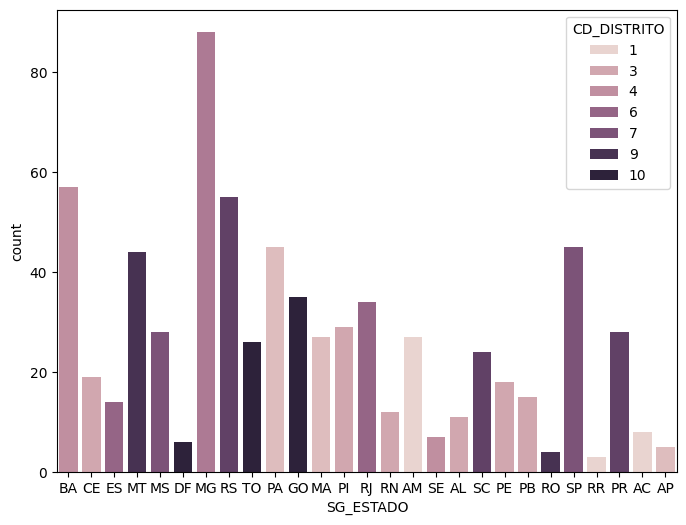

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x=df_estacoes_descrition_basic['SG_ESTADO'],
              hue=df_estacoes_descrition_basic['CD_DISTRITO'],
              data=df_estacoes_descrition_basic,
              )
plt.show()


In [19]:
crosstab_result = pd.crosstab(df_estacoes_descrition_basic['SG_ESTADO'], df_estacoes_descrition_basic['CD_DISTRITO'])
crosstab_result

CD_DISTRITO,1,2,3,4,5,6,7,8,9,10
SG_ESTADO,,,,,,,,,,
AC,8,0,0,0,0,0,0,0,0,0
AL,0,0,11,0,0,0,0,0,0,0
AM,27,0,0,0,0,0,0,0,0,0
AP,0,5,0,0,0,0,0,0,0,0
BA,0,0,0,57,0,0,0,0,0,0
CE,0,0,19,0,0,0,0,0,0,0
DF,0,0,0,0,0,0,0,0,0,6
ES,0,0,0,0,0,14,0,0,0,0
GO,0,0,0,0,0,0,0,0,0,35


In [20]:
count_por_estado_distrito = df.groupby(['SG_ESTADO', 'CD_DISTRITO']).size().reset_index(name='Contagem')
print(count_por_estado_distrito.sort_values('CD_DISTRITO'))


   SG_ESTADO CD_DISTRITO  Contagem
0         AC          01         8
21        RR          01         3
2         AM          01        27
9         MA          02        27
13        PA          02        45
3         AP          02         5
5         CE          03        19
1         AL          03        11
19        RN          03        12
16        PI          03        29
14        PB          03        15
15        PE          03        18
4         BA          04        57
24        SE          04         7
10        MG          05        88
18        RJ          06        34
7         ES          06        14
25        SP          07        45
11        MS          07        28
17        PR          08        28
22        RS          08        55
23        SC          08        24
12        MT          09        44
20        RO          09         4
8         GO          10        35
6         DF          10         6
26        TO          10        26


In [21]:
# seleciona estações por estados

tipo_busca = 'SG_ESTADO'
estado = 'RR'

df_estacoes_descrition_basic[df_estacoes_descrition_basic[tipo_busca] == estado]

,CD_ESTACAO,DC_NOME,SG_ESTADO,TP_ESTACAO,CD_DISTRITO
68,A135,BOA VISTA,RR,Automatica,1
588,82024,BOA VISTA,RR,Convencional,1
601,82042,CARACARAI,RR,Convencional,1


In [22]:
# selecionar a estação pelo código

tipo_busca = 'CD_ESTACAO'
codigo_estacao = 'A104'

df_estacoes_descrition_basic[df_estacoes_descrition_basic[tipo_busca] == codigo_estacao]


,CD_ESTACAO,DC_NOME,SG_ESTADO,TP_ESTACAO,CD_DISTRITO
427,A104,RIO BRANCO,AC,Automatica,1


In [23]:
len(df_estacoes_descrition_basic[df_estacoes_descrition_basic['SG_ESTADO'] == 'BA'])

57

In [24]:
df['SG_ESTADO'].sort_values().unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [28]:
df.loc[df['SG_ESTADO']== 'AM', ['DC_NOME', 'CD_ESTACAO', 'CD_WSI']]

,DC_NOME,CD_ESTACAO,CD_WSI
26,APUI,A113,0-76-0-1300144000000406
42,AUTAZES,A120,0-76-0-1300300000000339
51,BARCELOS,A128,0-76-0-1300409000000344
69,BOCA DO ACRE,A110,0-76-0-1300706000000400
139,COARI,A117,0-76-0-1301209000000335
181,EIRUNEPE,A109,0-76-0-1301407000000483
220,HUMAITA,A112,0-76-0-1301704000000349
240,ITACOATIARA,A121,0-76-0-1301902000000340
281,LABREA,A111,0-76-0-1302405000000412
300,MANACAPURU,A119,0-76-0-1302504000000331


In [26]:
df[df['SG_ESTADO'] == 'AC']['DC_NOME']

160              CRUZEIRO DO SUL
183               EPITACIOLANDIA
189                        FEIJO
308         MARECHAL THAUMATURGO
370    PARQUE ESTADUAL CHANDLESS
405                 PORTO WALTER
427                   RIO BRANCO
703                     TARAUACA
Name: DC_NOME, dtype: object